## generate data

In [3]:
from ddm import Model
from ddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNonDecision
from ddm.functions import fit_adjust_model, display_model
import matplotlib.pyplot as plt

In [4]:
model = Model(name='Simple model',
              drift=DriftConstant(drift=2.2),
              noise=NoiseConstant(noise=1.5),
              bound=BoundConstant(B=1.1),
              overlay=OverlayNonDecision(nondectime=.1),
              dx=.001, dt=.01, T_dur=2)
display_model(model)
sol = model.solve()

Model Simple model information:
Drift component DriftConstant:
    constant
    Fixed parameters:
    - drift: 2.200000
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.500000
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 1.100000
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fixed parameters:
    - nondectime: 0.100000



In [5]:
samp = sol.resample(10000)

In [6]:
plt.plot(s.model.t_domain(), s.pdf_corr())

NameError: name 's' is not defined

## fit data

In [15]:
from ddm import Fittable
from ddm.models import LossRobustBIC
from ddm.functions import fit_adjust_model

In [18]:
model_fit = Model(name='Simple model (fitted)',
                  drift=DriftConstant(drift=Fittable(minval=0, maxval=4)),
                  noise=NoiseConstant(noise=Fittable(minval=.5, maxval=4)),
                  bound=BoundConstant(B=1.1),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0, maxval=1)),
                  dx=.001, dt=.01, T_dur=2)
fit_adjust_model(samp, model_fit,
                 fitting_method="differential_evolution",
                 lossfunction=LossRobustBIC, verbose=False)

Params [2.30058561 1.51900128 0.11907831] gave 4024.323302597004


Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(2.3005856080099925, minval=0, maxval=4)), noise=NoiseConstant(noise=Fitted(1.5190012839637537, minval=0.5, maxval=4)), bound=BoundConstant(B=1.1), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.11907830992081192, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=2, fitresult=FitResult(fitting_method='differential_evolution', method='auto', loss='BIC', value=4024.323302597004, nparams=3, samplesize=10000, mess=''))

In [19]:
display_model(model_fit)

Model Simple model (fitted) information:
Drift component DriftConstant:
    constant
    Fitted parameters:
    - drift: 2.300586
Noise component NoiseConstant:
    constant
    Fitted parameters:
    - noise: 1.519001
Bound component BoundConstant:
    constant
    Fixed parameters:
    - B: 1.100000
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayNonDecision:
    Add a non-decision by shifting the histogram
    Fitted parameters:
    - nondectime: 0.119078
Fit information:
    Loss function: BIC
    Loss function value: 4024.323302597004
    Fitting method: differential_evolution
    Solver: auto
    Other properties:
        - nparams: 3
        - samplesize: 10000
        - mess: ''



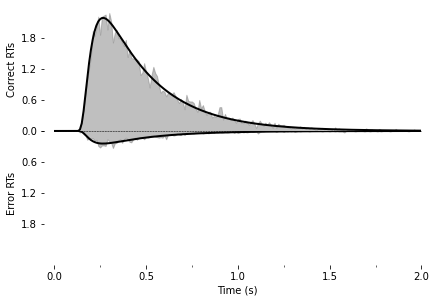

In [21]:
import ddm.plot
import matplotlib.pyplot as plt
ddm.plot.plot_fit_diagnostics(model=model_fit, sample=samp)
# plt.savefig("simple-fit.png")
plt.show()

In [43]:
ddm.plot.model_gui(model=model_fit, sample=samp)

cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var vals []
cond vars []
cond var v

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(2.47, minval=0, maxval=4)), noise=NoiseConstant(noise=Fitted(1.49, minval=0.5, maxval=4)), bound=BoundConstant(B=1.1), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.11, minval=0, maxval=1)), dx=0.001, dt=0.01, T_dur=2, fitresult=FitResult(fitting_method='differential_evolution', method='auto', loss='BIC', value=4024.323302597004, nparams=3, samplesize=10000, mess=''))

## Loading data from a CSV file

In [25]:
import pandas as pd
from ddm import Sample

In [26]:
df_rt = pd.read_csv("roitman_rts.csv")

In [40]:
df_rt

,monkey,rt,coh,correct,trgchoice
0,1,0.355,0.512,1.0,2.0
1,1,0.359,0.256,1.0,1.0
2,1,0.525,0.128,1.0,1.0
3,1,0.332,0.512,1.0,1.0
4,1,0.302,0.032,0.0,2.0
...,...,...,...,...,...
2610,1,0.616,0.064,1.0,2.0
2611,1,0.707,0.128,1.0,1.0
2612,1,0.821,0.000,0.0,1.0
2613,1,0.557,0.256,1.0,2.0


In [28]:
df_rt = df_rt[df_rt["monkey"] == 1]

In [31]:
df_rt = df_rt[(df_rt["rt"] > .1) & (df_rt["rt"] < 1.65)]

In [32]:
roitman_sample = Sample.from_pandas_dataframe(df_rt, rt_column_name="rt", correct_column_name="correct")

In [44]:
import ddm.models
class DriftCoherence(ddm.models.Drift):
    name = "Drift depends linearly on coherence"
    required_parameters = ["driftcoh"] # <-- Parameters we want to include in the model
    required_conditions = ["coh"] # <-- Task parameters ("conditions"). Should be the same name as in the sample.
    
    # We must always define the get_drift function, which is used to compute the instantaneous value of drift.
    def get_drift(self, conditions, **kwargs):
        return self.driftcoh * conditions['coh']

In [45]:
from ddm import Model, Fittable
from ddm.functions import fit_adjust_model, display_model
from ddm.models import NoiseConstant, BoundConstant, OverlayChain, OverlayNonDecision, OverlayPoissonMixture

In [46]:
model_rs = Model(name='Roitman data, drift varies with coherence',
                 drift=DriftCoherence(driftcoh=Fittable(minval=0, maxval=20)),
                 noise=NoiseConstant(noise=1),
                 bound=BoundConstant(B=Fittable(minval=.1, maxval=1.5)),
                 # Since we can only have one overlay, we use
                 # OverlayChain to string together multiple overlays. They are applied sequentially in order.
                 # OverlayNonDecision implements a non-decision time by shifting the
                 # resulting distribution of response times by `nondectime` seconds.
                 overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fittable(minval=0, maxval=.4)), OverlayPoissonMixture(pmixturecoef=.02, rate=1)]), dx=.001, dt=.01, T_dur=2)

In [47]:
# Fitting this will also be fast because PyDDM can automatically
# determine that DriftCoherence will allow an analytical solution.
fit_model_rs = fit_adjust_model(sample=roitman_sample, model=model_rs, verbose=False)

Params [10.36088485  0.74400318  0.31037723] gave 199.33395813446037


In [48]:
display_model(fit_model_rs)

Model Roitman data, drift varies with coherence information:
Drift component DriftCoherence:
    Drift depends linearly on coherence
    Fitted parameters:
    - driftcoh: 10.360885
Noise component NoiseConstant:
    constant
    Fixed parameters:
    - noise: 1.000000
Bound component BoundConstant:
    constant
    Fitted parameters:
    - B: 0.744003
IC component ICPointSourceCenter:
    point_source_center
    (No parameters)
Overlay component OverlayChain:
    Overlay component OverlayNonDecision:
        Add a non-decision by shifting the histogram
        Fitted parameters:
        - nondectime: 0.310377
    Overlay component OverlayPoissonMixture:
        Poisson distribution mixture model (lapse rate)
        Fixed parameters:
        - pmixturecoef: 0.020000
        - rate: 1.000000
Fit information:
    Loss function: Negative log likelihood
    Loss function value: 199.33395813446037
    Fitting method: differential_evolution
    Solver: auto
    Other properties:
        - n

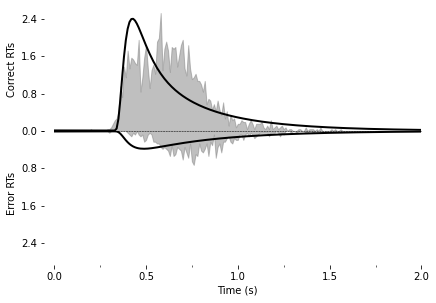

In [49]:
import ddm.plot
import matplotlib.pyplot as plt
ddm.plot.plot_fit_diagnostics(model=fit_model_rs, sample=roitman_sample)
plt.show()

In [50]:
ddm.plot.model_gui(model=fit_model_rs, sample=roitman_sample)

cond var vals [{'0.0': 0.0, '0.032': 0.032, '0.064': 0.064, '0.128': 0.128, '0.256': 0.256, '0.512': 0.512}]
cond vars [<tkinter.StringVar object at 0x0000022CC619A490>]
cond var vals [{'0.0': 0.0, '0.032': 0.032, '0.064': 0.064, '0.128': 0.128, '0.256': 0.256, '0.512': 0.512}]
cond vars [<tkinter.StringVar object at 0x0000022CC619A490>]
cond var vals [{'0.0': 0.0, '0.032': 0.032, '0.064': 0.064, '0.128': 0.128, '0.256': 0.256, '0.512': 0.512}]
cond vars [<tkinter.StringVar object at 0x0000022CC619A490>]
cond var vals [{'0.0': 0.0, '0.032': 0.032, '0.064': 0.064, '0.128': 0.128, '0.256': 0.256, '0.512': 0.512}]
cond vars [<tkinter.StringVar object at 0x0000022CC619A490>]
cond var vals [{'0.0': 0.0, '0.032': 0.032, '0.064': 0.064, '0.128': 0.128, '0.256': 0.256, '0.512': 0.512}]
cond vars [<tkinter.StringVar object at 0x0000022CC619A490>]
cond var vals [{'0.0': 0.0, '0.032': 0.032, '0.064': 0.064, '0.128': 0.128, '0.256': 0.256, '0.512': 0.512}]
cond vars [<tkinter.StringVar object at 0

Model(name='Roitman data, drift varies with coherence', drift=DriftCoherence(driftcoh=Fitted(10.51, minval=0, maxval=20)), noise=NoiseConstant(noise=1), bound=BoundConstant(B=Fitted(0.798, minval=0.1, maxval=1.5)), IC=ICPointSourceCenter(), overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fitted(0.31037723190041006, minval=0, maxval=0.4)), OverlayPoissonMixture(pmixturecoef=0.02, rate=1)]), dx=0.001, dt=0.01, T_dur=2, fitresult=FitResult(fitting_method='differential_evolution', method='auto', loss='Negative log likelihood', value=199.33395813446037, nparams=3, samplesize=2611, mess=''))

In [2]:
import ddm
class DriftCoherenceLeak(ddm.models.Drift):
    name = "Leaky drift depends linearly on coherence"
    required_parameters = ["driftcoh", "leak"] # <-- Parameters we want to include in the model
    required_conditions = ["coh"] # <-- Task parameters ("conditions"). Should be the same name as in the sample.
    
    # We must always define the get_drift function, which is used to compute the instantaneous value of drift.
    def get_drift(self, x, conditions, **kwargs):
        return self.driftcoh * conditions['coh'] + self.leak * x

NameError: name 'ddm' is not defined

In [52]:
from ddm.models import BoundCollapsingExponential
model_leak = Model(name='Roitman data, leaky drift varies with coherence',
                   drift=DriftCoherenceLeak(driftcoh=Fittable(minval=0, maxval=20),
                                            leak=Fittable(minval=-10, maxval=10)),
                   noise=NoiseConstant(noise=1),
                   bound=BoundCollapsingExponential(B=Fittable(minval=0.5, maxval=3),
                                                    tau=Fittable(minval=.0001, maxval=5)),
                   # Since we can only have one overlay, we use
                   # OverlayChain to string together multiple overlays.
                   # They are applied sequentially in order.  OverlayDelay
                   # implements a non-decision time by shifting the
                   # resulting distribution of response times by
                   # `delaytime` seconds.
                   overlay=OverlayChain(overlays=[OverlayNonDecision(nondectime=Fittable(minval=0, maxval=.4)),
                                                  OverlayPoissonMixture(pmixturecoef=.02,
                                                                        rate=1)]),
                   dx=.01, dt=.01, T_dur=2)

In [1]:
from ddm.plot import model_gui
model_gui(model_leak, sample=roitman_sample)

NameError: name 'model_leak' is not defined